<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASE 2 - CUSTOMER SEGMENTATION  </h1> </center> <br>
<center> PROJECT 2021/2022 - MDSAA-BA </center>

**GROUP BY:**    <br> 
- Beatriz Ferreira (20210630) <br>
- Beatriz Peres (20210910) <br>
- Diogo Marques (20210605) <br>
- Miriam Hadidi (20210644)

In [ ]:
**Table of Contents** <br>
* [1. Imports](#import)
    * [1.1. Import Libraries](#importlibraries)
    * [1.2. Import Dataset](#importdataset)
* [2. Data Preparation](#datapreparation)
    * [2.1. Check Missing Values and Remove Duplicates](#missingvalues)
    * [2.2. Explore and Change Wrong Datatypes](#Coherence)
    * [2.3. Ordinal Encoding - Arrival Date Year](#encoding)
    * [2.4. Descriptive Statistics](#statistics)
    * [2.5. Define First Set of Metric and Non Metric Features](#metrics)
    * [2.6. Outliers Removal - Manually and Z-Score](#outliers)
* [3. Data Pre-Processing](#pre-processing)
    * [3.1. 1st Feature Selection and Feature Engineering](#engineering)
        * [3.1.1. New Variables](#newvariables)
* [4. Data Partition](#partition)
    * [4.1. Train-Test Split](#traintestsplit)
* [5. Data Scaling](#scaling)
* [6. 2nd Feature Selection](#selection)
    * [6.1. Univariate Variables](#univariate)
    * [6.2. Chi-Square Test](#chisqaure)
    * [6.3. Lasso Regression](#lasso)
* [7. One Hot Encoder](#dummies) 
* [8. Modelling](#models)
    * [8.1. Decision Tree Classifier](#decisiontree)
    * [8.2. AdaBoost Classifier](#adaboost)
    * [8.3. GradientBoosting](#gradient)
    * [8.4. Random Forest Classifier](#randomforest)
    * [8.5. Stacking Classifier](#stacking)
* [9. Models Comparison](#comparison)
* [10. Final Model](#final)
* [11. Classification Report and Confusion Matrix](#matrix)
* [12. Final Predictions](#fpredictions)

<hr>
<a class="anchor" id="import">
    
# 1. Imports
    
</a>

<a class="anchor" id="importlibraries">

## 1.1. Import Libraries

</a>

In [3]:
#import necessary libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os
import pip

!pip install graphviz

import matplotlib.cm as cm
import scipy.stats as stats


from math import ceil
from itertools import product
from os.path import join
from collections import Counter

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'svg' # optionally, you can change 'svg' to 'retina'

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier
from sklearn.feature_selection import RFE
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances, f1_score, classification_report, accuracy_score, mean_absolute_error, roc_auc_score
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Seeting seaborn style
sns.set()

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


<a class="anchor" id="importdataset">

## 1.2. Import Dataset

</a>

In [4]:
df = pd.read_csv('H2.csv')
df

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0               0         6             2015             July   
1               1        88             2015             July   
2               1        65             2015             July   
3               1        92             2015             July   
4               1       100             2015             July   
...           ...       ...              ...              ...   
79325           0        23             2017           August   
79326           0       102             2017           August   
79327           0        34             2017           August   
79328           0       109             2017           August   
79329           0       205             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                         27                      1                     0   
1                         27                      1                     0   
2                         27                      1                     0   
3                         27                      1                     2   
4                         27                      2                     0   
...                      ...                    ...                   ...   
79325                     35                     30                     2   
79326                     35                     31                     2   
79327                     35                     31                     2   
79328                     35                     31                     2   
79329                     35                     29                     2   

       StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                      2       1       0.0  ...  No Deposit                 6   
1                      4       2       0.0  ...  No Deposit                 9   
2                      4       1       0.0  ...  No Deposit                 9   
3                      4       2       0.0  ...  No Deposit                 9   
4                      2       2       0.0  ...  No Deposit                 9   
...                  ...     ...       ...  ...              ...          ...   
79325                  5       2       0.0  ...  No Deposit               394   
79326                  5       3       0.0  ...  No Deposit                 9   
79327                  5       2       0.0  ...  No Deposit                 9   
79328                  5       2       0.0  ...  No Deposit                89   
79329                  7       2       0.0  ...  No Deposit                 9   

           Company DaysInWaitingList CustomerType     ADR  \
0             NULL                 0    Transient    0.00   
1             NULL                 0    Transient   76.50   
2             NULL                 0    Transient   68.00   
3             NULL                 0    Transient   76.50   
4             NULL                 0    Transient   76.50   
...            ...               ...          ...     ...   
79325         NULL                 0    Transient   96.14   
79326         NULL                 0    Transient  225.43   
79327         NULL                 0    Transient  157.71   
79328         NULL                 0    Transient  104.40   
79329         NULL                 0    Transient  151.20   

       RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus  \
0                             0                       0         Check-Out   
1                             0                       1          Canceled   
2                             0                       1          Canceled   
3                             0                       2          Canceled   
4                             0                       1          Canceled   
...                         ...                     ...               ...   
79325                         0                       0 

<hr>
<a class="anchor" id="datapreparation">
    
# 2. Data Preparation
    
</a>

<a class="anchor" id="missingvalues">

## 2.1. Check Missing Values

</a>

In [5]:
# count the missing values
df.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [6]:
df[df.isna().any(axis=1)]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
540             1         2             2015           August   
607             1         1             2015           August   
619             1         1             2015           August   
1100            1         8             2015           August   
4831            1       193             2015          October   
4832            1       193             2015          October   
4833            1       193             2015          October   
4834            1       193             2015          October   
4835            1       193             2015          October   
4836            1       193             2015          October   
4837            1       193             2015          October   
4838            1       193             2015          October   
4839            1       193             2015          October   
4841            1       193             2015          October   
4842            1       193             2015          October   
4843            1       193             2015          October   
4844            1       193             2015          October   
4845            1       193             2015          October   
20591           1         0             2016         November   
21184           1         0             2016         December   
21185           1         0             2016         December   
21189           1         0             2016         December   
25847           1         0             2017            April   
25848           1         0             2017            April   
25849           1         0             2017            April   
25850           1         0             2017            April   
40770           0         4             2015         November   
61428           0         1             2016         November   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
540                       32                      3                     1   
607                       32                      5                     0   
619                       32                      5                     0   
1100                      33                     13                     2   
4831                      42                     15                     0   
4832                      42                     15                     0   
4833                      42                     15                     0   
4834                      42                     15                     0   
4835                      42                     15                     0   
4836                      42                     15                     0   
4837                      42                     15                     0   
4838                      42                     15                     0   
4839                      42                     15                     0   
4841                      42                     15                     0   
4842                      42                     15                     0   
4843                      42                     15                     0   
4844                      42                     15                     0   
4845                      42                     15                     0   
20591                     47                     17                     4   
21184                     50                      6                     0   
21185                     50                      6                     0   
21189                     50                      6                     0   
25847                     15                     10                     0   
25848                     15                     10                     0   
25849                     15                     10                     0   
25850                     15                     10                     0   
40770                     48              

In [7]:
# drop the duplicated values - they can lead to the model being biased
df.duplicated().sum() 
df.drop_duplicates(inplace = True)

<a class="anchor" id="Coherence">

## 2.2. Explore and Change Wrong Datatypes

</a>

In [8]:
# Check Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53428 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   53428 non-null  int64  
 1   LeadTime                     53428 non-null  int64  
 2   ArrivalDateYear              53428 non-null  int64  
 3   ArrivalDateMonth             53428 non-null  object 
 4   ArrivalDateWeekNumber        53428 non-null  int64  
 5   ArrivalDateDayOfMonth        53428 non-null  int64  
 6   StaysInWeekendNights         53428 non-null  int64  
 7   StaysInWeekNights            53428 non-null  int64  
 8   Adults                       53428 non-null  int64  
 9   Children                     53424 non-null  float64
 10  Babies                       53428 non-null  int64  
 11  Meal                         53428 non-null  object 
 12  Country                      53422 non-null  object 
 13  MarketSegment   

- **Children values that were missing, were assumed to be zero**

In [9]:
# The missing values of the children are assumed to be zero
df['Children'] = df['Children'].fillna(0)
df[df['Children'].isna()]

Empty DataFrame
Columns: [IsCanceled, LeadTime, ArrivalDateYear, ArrivalDateMonth, ArrivalDateWeekNumber, ArrivalDateDayOfMonth, StaysInWeekendNights, StaysInWeekNights, Adults, Children, Babies, Meal, Country, MarketSegment, DistributionChannel, IsRepeatedGuest, PreviousCancellations, PreviousBookingsNotCanceled, ReservedRoomType, AssignedRoomType, BookingChanges, DepositType, Agent, Company, DaysInWaitingList, CustomerType, ADR, RequiredCarParkingSpaces, TotalOfSpecialRequests, ReservationStatus, ReservationStatusDate]
Index: []

[0 rows x 31 columns]

<a class="anchor" id="encoding">

## 2.3. Ordinal Encoding - Arrival Date Month

</a>

In [10]:
# encode the variable Arrival Date Month, in order to get it more useful when modelling
import datetime

df['ArrivalDateMonth_num'] = df.apply(lambda x: datetime.datetime.strptime(x['ArrivalDateMonth'], "%B").month, axis=1)

df


IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0               0         6             2015             July   
1               1        88             2015             July   
2               1        65             2015             July   
3               1        92             2015             July   
4               1       100             2015             July   
...           ...       ...              ...              ...   
79325           0        23             2017           August   
79326           0       102             2017           August   
79327           0        34             2017           August   
79328           0       109             2017           August   
79329           0       205             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                         27                      1                     0   
1                         27                      1                     0   
2                         27                      1                     0   
3                         27                      1                     2   
4                         27                      2                     0   
...                      ...                    ...                   ...   
79325                     35                     30                     2   
79326                     35                     31                     2   
79327                     35                     31                     2   
79328                     35                     31                     2   
79329                     35                     29                     2   

       StaysInWeekNights  Adults  Children  ...        Agent      Company  \
0                      2       1       0.0  ...            6         NULL   
1                      4       2       0.0  ...            9         NULL   
2                      4       1       0.0  ...            9         NULL   
3                      4       2       0.0  ...            9         NULL   
4                      2       2       0.0  ...            9         NULL   
...                  ...     ...       ...  ...          ...          ...   
79325                  5       2       0.0  ...          394         NULL   
79326                  5       3       0.0  ...            9         NULL   
79327                  5       2       0.0  ...            9         NULL   
79328                  5       2       0.0  ...           89         NULL   
79329                  7       2       0.0  ...            9         NULL   

      DaysInWaitingList CustomerType     ADR  RequiredCarParkingSpaces  \
0                     0    Transient    0.00                         0   
1                     0    Transient   76.50                         0   
2                     0    Transient   68.00                         0   
3                     0    Transient   76.50                         0   
4                     0    Transient   76.50                         0   
...                 ...          ...     ...                       ...   
79325                 0    Transient   96.14                         0   
79326                 0    Transient  225.43                         0   
79327                 0    Transient  157.71                         0   
79328                 0    Transient  104.40                         0   
79329                 0    Transient  151.20                         0   

       TotalOfSpecialRequests  ReservationStatus ReservationStatusDate  \
0                           0          Check-Out            2015-07-03   
1                           1           Canceled            2015-07-01   
2                           1           Canceled            2015-04-30   
3                           2           Canceled            2015-06-23   
4                           1           Canceled            2015-04-02   
...                       ...              

In [11]:
df['ArrivalDateMonth_num'].value_counts()

8     6591
7     5744
5     5413
4     5080
6     5005
3     4856
9     4240
10    4208
2     3605
12    3014
11    2942
1     2730
Name: ArrivalDateMonth_num, dtype: int64

In [12]:
non_metric_features1 = ['Country']

In [13]:
# convert categorical variable Country to numerical

# Create Ordinal encoder
ordinal_encoder = OrdinalEncoder()

# Select non-null values of the Country Variable
country = df["Country"]
country_not_null = country[country.notnull()]

# Reshape country_not_null to shape (-1, 1)
reshaped_vals = country_not_null.values.reshape(-1,1)

# Ordinally encode reshaped_vals
encoded_vals = ordinal_encoder.fit_transform(reshaped_vals)

# Assign back encoded values to non-null values
df.loc[country.notnull(), "Country"] = np.squeeze(encoded_vals)

In [14]:
# Create KNN imputer
#  parameter weights = 'distance' so the nearest neighbors have more influence/weight 
# on the prediction than the farthest ones

KNN_imputer = KNNImputer(n_neighbors = 1, weights = 'distance')

df[non_metric_features1] = KNN_imputer.fit_transform(df[non_metric_features1])

reshaped_vals = df["Country"].values.reshape(-1,1)

df["Country"] = ordinal_encoder.inverse_transform(reshaped_vals)

df[non_metric_features1].head()

Country
0     PRT
1     PRT
2     PRT
3     PRT
4     PRT

In [15]:
# encode the variable Country, in order to get it more useful when modelling
ord_enc = OrdinalEncoder()
df['Country'] = ord_enc.fit_transform(df[['Country']])

<a class="anchor" id="statistics">

## 2.4. Descriptive Statistics

</a>

In [16]:
# Check the descriptive statistics, in order to check some incosistent values
df.describe()

IsCanceled      LeadTime  ArrivalDateYear  ArrivalDateWeekNumber  \
count  53428.000000  53428.000000     53428.000000           53428.000000   
mean       0.300386     77.678521      2016.253968              26.637606   
std        0.458430     82.113381         0.659292              13.586280   
min        0.000000      0.000000      2015.000000               1.000000   
25%        0.000000     14.000000      2016.000000              16.000000   
50%        0.000000     50.000000      2016.000000              27.000000   
75%        1.000000    118.000000      2017.000000              37.000000   
max        1.000000    629.000000      2017.000000              53.000000   

       ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  \
count           53428.000000          53428.000000       53428.000000   
mean               15.755166              0.872164           2.274444   
std                 8.801575              0.913756           1.618630   
min                 1.000000              0.000000           0.000000   
25%                 8.000000              0.000000           1.000000   
50%                16.000000              1.000000           2.000000   
75%                23.000000              2.000000           3.000000   
max                31.000000             16.000000          41.000000   

             Adults      Children        Babies       Country  \
count  53428.000000  53428.000000  53428.000000  53428.000000   
mean       1.876338      0.131841      0.007337     75.216665   
std        0.544292      0.442161      0.102665     42.500549   
min        0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000     46.000000   
50%        2.000000      0.000000      0.000000     53.000000   
75%        2.000000      0.000000      0.000000    125.000000   
max        4.000000      3.000000     10.000000    165.000000   

       IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  \
count     53428.000000           53428.000000                 53428.000000   
mean          0.031968               0.035768                     0.191491   
std           0.175917               0.372784                     2.038798   
min           0.000000               0.000000                     0.000000   
25%           0.000000               0.000000                     0.000000   
50%           0.000000               0.000000                     0.000000   
75%           0.000000               0.000000                     0.000000   
max           1.000000              21.000000                    72.000000   

       BookingChanges  DaysInWaitingList           ADR  \
count    53428.000000       53428.000000  53428.000000   
mean         0.246369           1.020233    110.985944   
std          0.704063          11.901703     48.062518   
min          0.000000           0.000000      0.000000   
25%          0.000000           0.000000     84.000000   
50%          0.000000           0.000000    105.300000   
75%          0.000000           0.000000    134.000000   
max         21.000000         391.000000   5400.000000   

       RequiredCarParkingSpaces  TotalOfSpecialRequests  ArrivalDateMonth_num  
count              53428.000000            53428.000000          53428.000000  
mean                   0.035618                0.710994              6.431628  
std                    0.186244                0.833540              3.074627  
min                    0.000000                0.000000              1.000000  
25%                    0.000000                0.000000              4.000000  
50%                    0.000000                1.000000              7.000000  
75%                    0.000000                1.000000              9.000000  
max                    3.000000                5.000000             12.000000

<a class="anchor" id="metrics">

## 2.5. Define First Set of Metric and Non Metric Features

</a>

In [17]:
#Define metric and non-metric features
non_metric_features = ['ArrivalDateYear','ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'Meal', 'Country','MarketSegment','DistributionChannel','ReservedRoomType','AssignedRoomType','DepositType','Agent','Company','CustomerType','ReservationStatus','ReservationStatusDate', 'IsRepeatedGuest','ArrivalDateMonth_num']
metric_features = ['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies','PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges','DaysInWaitingList','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests']
metric_features

['LeadTime',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'DaysInWaitingList',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests']

<a class="anchor" id="outliers">

## 2.6. Outliers Removal - Manually and Z-Score

</a>

In [18]:
# combine all numerical variables in one figure
sns.set()

# create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

In [19]:
# All Numeric Variables' Box Plots in one figure
#sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
#fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
#for ax, feat in zip(axes.flatten(), metric_features):
    #sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
#title = "Numeric Variables' Box Plots"

#plt.suptitle(title)

#plt.show()

In [20]:
# Define a set of filters for each variable, in order to remove them manually
filters1 = (
    (df['Babies'] != 9)
    &
    (df['Babies'] != 10)
    &
    (df['ADR'] != 5400)
    &
    (df['Adults'] != 0)
    &
    (df['PreviousCancellations'] != 21)
    &
    (df['RequiredCarParkingSpaces'] != 3)
    &
    (df['DistributionChannel'] != "Undefined")
)

df_1 = df[filters1]

In [21]:
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9928


In [22]:
z1 = np.abs(stats.zscore(df[metric_features]))

#only keep rows in dataframe with all z-scores less than absolute value of 6
df_zscore = df[(z1 < 6).all(axis = 1)]

print('Percentage of train data kept after removing outliers:', np.round(df_zscore.shape[0] / df.shape[0], 4))

Percentage of train data kept after removing outliers: 0.9777


In [23]:
print('Percentage of data kept after removing outliers:', np.round(df_zscore.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9777


In [24]:
df = df_1.copy()

<a class="anchor" id="pre-processing">

# 3. Data Pre-Processing

</a>

<a class="anchor" id="engineering">

## 3.1. 1st Feature Selection and Feature Engineering

</a>

In [25]:
# create function to plot correlation heatmap
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    matrix = np.triu(cor)
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Greens, fmt='.1', mask = matrix)
    plt.show()

cor_spearman = df[metric_features].corr(method ='spearman')
cor_heatmap(cor_spearman)

* Nothing much info to extract from the correlation matrix
* No two variables are highly correlated enough to eliminate one based on the other

<a class="anchor" id="newvariables">

## 3.1.1. New Variables

</a>

In [26]:
df[['ReservedRoomType', 'AssignedRoomType']]

ReservedRoomType  AssignedRoomType
0      A                 A               
1      A                 A               
2      A                 A               
3      A                 A               
4      A                 A               
...                 ...               ...
79325  A                 A               
79326  E                 E               
79327  D                 D               
79328  A                 A               
79329  A                 A               

[53045 rows x 2 columns]

In [27]:
# Create a new variable that will assume the value 0 if the room reserved is different from the one 
# that was assigned, and else it will assume value 1
df['RoomTypeChange'] = df.apply (lambda row: 0 if(row.ReservedRoomType == row.AssignedRoomType) else 1, axis=1)

In [28]:
df[['ReservedRoomType', 'AssignedRoomType','RoomTypeChange']]

ReservedRoomType  AssignedRoomType  RoomTypeChange
0      A                 A                              0
1      A                 A                              0
2      A                 A                              0
3      A                 A                              0
4      A                 A                              0
...                 ...               ...             ...
79325  A                 A                              0
79326  E                 E                              0
79327  D                 D                              0
79328  A                 A                              0
79329  A                 A                              0

[53045 rows x 3 columns]

In [29]:
df[['ReservedRoomType', 'AssignedRoomType', 'RoomTypeChange']].loc[df['RoomTypeChange'] == 1]

ReservedRoomType  AssignedRoomType  RoomTypeChange
134    A                 F                              1
139    F                 A                              1
237    A                 D                              1
267    A                 G                              1
289    A                 D                              1
...                 ...               ...             ...
79213  A                 K                              1
79214  A                 K                              1
79229  E                 F                              1
79237  D                 F                              1
79297  A                 D                              1

[5947 rows x 3 columns]

In [30]:
# Create a new variable that will return the number of depedents for each booking
df['Dependents'] = df['Children'] + df['Babies']
df['Dependents']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
79325    0.0
79326    0.0
79327    0.0
79328    0.0
79329    0.0
Name: Dependents, Length: 53045, dtype: float64

In [31]:
# Drop some not usable variables
df = df.drop(['ArrivalDateWeekNumber', 'ArrivalDateMonth','ArrivalDateDayOfMonth', 'ReservedRoomType', 'AssignedRoomType', 'ReservationStatus', 'ReservationStatusDate','Company', 'Children', 'Babies'],axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53045 entries, 0 to 79329
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   53045 non-null  int64  
 1   LeadTime                     53045 non-null  int64  
 2   ArrivalDateYear              53045 non-null  int64  
 3   StaysInWeekendNights         53045 non-null  int64  
 4   StaysInWeekNights            53045 non-null  int64  
 5   Adults                       53045 non-null  int64  
 6   Meal                         53045 non-null  object 
 7   Country                      53045 non-null  float64
 8   MarketSegment                53045 non-null  object 
 9   DistributionChannel          53045 non-null  object 
 10  IsRepeatedGuest              53045 non-null  int64  
 11  PreviousCancellations        53045 non-null  int64  
 12  PreviousBookingsNotCanceled  53045 non-null  int64  
 13  BookingChanges  

<a class="anchor" id="partition">

## 4. Data Partition

</a>

In [33]:
# Create a train dataset with the observations from the years 2015 and 2016
grouped = df.groupby(df.ArrivalDateYear)
df_train = grouped.get_group(2015)
df_new2 = grouped.get_group(2016)
df_train = df_train.append(df_new2)
del df_train['ArrivalDateYear']

In [34]:
# Create a test dataset with the observations from the year 2017
df_test = grouped.get_group(2017)
del df_test['IsCanceled']
del df_test['ArrivalDateYear']

In [35]:
# Define a new set of features to work in the modelling part
non_metric_features = ['Meal','MarketSegment','DistributionChannel','DepositType','Agent','CustomerType']
binary_features = ['IsRepeatedGuest','RoomTypeChange','ArrivalDateMonth_num','Country']
metric_features = ['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults','PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges','DaysInWaitingList','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests','Dependents']

In [36]:
data_hotel = df_train.copy()

<a class="anchor" id="traintestsplit">

## 4.1. Train-Test Split

</a>

In [37]:
# Define X matrix and target (y)
X = data_hotel.drop("IsCanceled", axis = 1)
y = data_hotel["IsCanceled"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.35, random_state = 10, stratify = y, shuffle = True)

In [38]:
# Define a new object named a X_train_num_bin where only the numerical and binary variables are mantained, 
# a object named as X_train_cat with all the categorical independent variables
# The same for the test data

X_train_num_bin = X_train[binary_features + metric_features]
X_val_num_bin = X_val[binary_features + metric_features]

X_train_cat = X_train[non_metric_features]
X_val_cat = X_val[non_metric_features]

<a class="anchor" id="scaling">

## 5. Data Scaling

</a>

In [39]:
# scaling train data

scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num_bin)# this will return an array

# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num_bin.columns).set_index(X_train.index)

In [40]:
# scaling val data

X_val_num_scaled = scaler.fit_transform(X_val_num_bin)

X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num_bin.columns).set_index(X_val.index)

<a class="anchor" id="selection">

## 6. 2nd Feature Selection

</a>

<a class="anchor" id="univariate">

## 6.1. Univariate Variables

</a>

In [41]:
# Check if any of the numerical variables is univariate (variance is equal to 0)
# It's not the case so we don't need to drop any variable

X_train_num_scaled.var()

IsRepeatedGuest                0.032490
RoomTypeChange                 0.119376
ArrivalDateMonth_num           0.081497
Country                        0.068944
LeadTime                       0.015074
StaysInWeekendNights           0.004244
StaysInWeekNights              0.002242
Adults                         0.030433
PreviousCancellations          0.001185
PreviousBookingsNotCanceled    0.001096
BookingChanges                 0.001580
DaysInWaitingList              0.001355
ADR                            0.007503
RequiredCarParkingSpaces       0.010275
TotalOfSpecialRequests         0.026068
Dependents                     0.019651
dtype: float64

<a class="anchor" id="chisquare">

## 6.2. Chi-Square Test

</a>

In [42]:
# Perform the Chi-Square Test to check the importance of categorical features
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [43]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var], y_train, var)

Meal is IMPORTANT for Prediction
MarketSegment is IMPORTANT for Prediction
DistributionChannel is IMPORTANT for Prediction
DepositType is IMPORTANT for Prediction
Agent is IMPORTANT for Prediction
CustomerType is IMPORTANT for Prediction


<a class="anchor" id="lasso">

## 6.3. Lasso Regression

</a>

In [44]:
# Perform a lasso regression to plot the importance of the final set of numerical features
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [45]:
reg = LassoCV()
reg.fit(X_train_num_scaled, y_train)

LassoCV()

In [46]:
# Check the coeficients for each variable
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

IsRepeatedGuest               -0.017740
RoomTypeChange                -0.226097
ArrivalDateMonth_num           0.021874
Country                        0.206946
LeadTime                       0.573341
StaysInWeekendNights           0.180000
StaysInWeekNights              0.681220
Adults                         0.126351
PreviousCancellations          0.976620
PreviousBookingsNotCanceled   -0.456766
BookingChanges                -0.838834
DaysInWaitingList             -0.404336
ADR                            0.572449
RequiredCarParkingSpaces      -0.490856
TotalOfSpecialRequests        -0.532232
Dependents                     0.111333
dtype: float64

In [47]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 16 variables and eliminated the other 0 variables


In [48]:
coef.sort_values()

BookingChanges                -0.838834
TotalOfSpecialRequests        -0.532232
RequiredCarParkingSpaces      -0.490856
PreviousBookingsNotCanceled   -0.456766
DaysInWaitingList             -0.404336
RoomTypeChange                -0.226097
IsRepeatedGuest               -0.017740
ArrivalDateMonth_num           0.021874
Dependents                     0.111333
Adults                         0.126351
StaysInWeekendNights           0.180000
Country                        0.206946
ADR                            0.572449
LeadTime                       0.573341
StaysInWeekNights              0.681220
PreviousCancellations          0.976620
dtype: float64

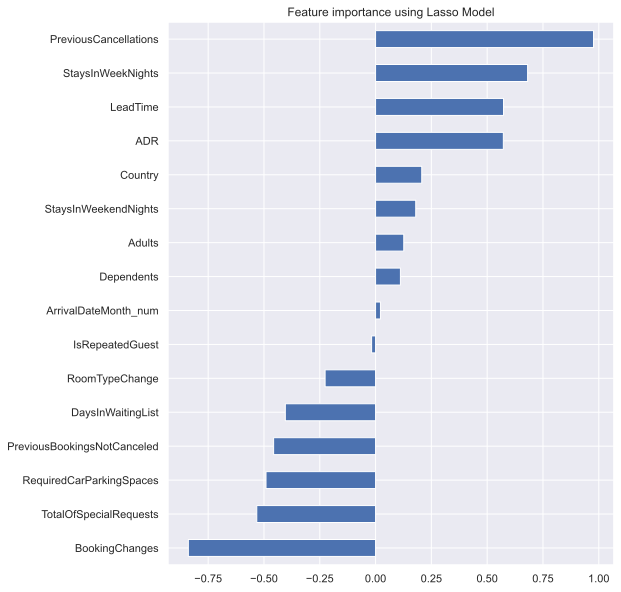

In [49]:
plot_importance(coef,'Lasso')

<a class="anchor" id="dummies">

## 7. One Hot Encoder

</a>

In [50]:
# Transform categorical variables into dummies in the train dataset
df_ohc = df_train.copy()

ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc[['Meal','MarketSegment','DistributionChannel','DepositType','CustomerType']])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)

df_ohc = pd.concat([df_ohc.drop(columns=non_metric_features), ohc_df], axis=1)

df_ohc.head()

IsCanceled  LeadTime  StaysInWeekendNights  StaysInWeekNights  Adults  \
0           0         6                     0                  2       1   
1           1        88                     0                  4       2   
2           1        65                     0                  4       1   
3           1        92                     2                  4       2   
4           1       100                     0                  2       2   

   Country  IsRepeatedGuest  PreviousCancellations  \
0    125.0                0                      0   
1    125.0                0                      0   
2    125.0                0                      0   
3    125.0                0                      0   
4    125.0                0                      0   

   PreviousBookingsNotCanceled  BookingChanges  ...  x1_Offline TA/TO  \
0                            0               0  ...               1.0   
1                            0               0  ...               0.0   
2                            0               0  ...               0.0   
3                            0               0  ...               0.0   
4                            0               0  ...               0.0   

   x1_Online TA  x2_Direct  x2_GDS  x2_TA/TO  x3_Non Refund       \
0           0.0        0.0     0.0       1.0                 0.0   
1           1.0        0.0     0.0       1.0                 0.0   
2           1.0        0.0     0.0       1.0                 0.0   
3           1.0        0.0     0.0       1.0                 0.0   
4           1.0        0.0     0.0       1.0                 0.0   

   x3_Refundable       x4_Group  x4_Transient  x4_Transient-Party  
0                 0.0       0.0           1.0                 0.0  
1                 0.0       0.0           1.0                 0.0  
2                 0.0       0.0           1.0                 0.0  
3                 0.0       0.0           1.0                 0.0  
4                 0.0       0.0           1.0                 0.0  

[5 rows x 34 columns]

In [51]:
# # Transform categorical variables into dummies in the test dataset
df_ohc_t = df_test.copy()

ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_ohc_t[['Meal','MarketSegment','DistributionChannel','DepositType','CustomerType']])
ohc_feat_names = ohc.get_feature_names()
ohc_df_t = pd.DataFrame(ohc_feat, index=df_ohc_t.index, columns=ohc_feat_names) 

df_ohc_t = pd.concat([df_ohc_t.drop(columns=non_metric_features), ohc_df_t], axis=1)

df_ohc_t.head()

LeadTime  StaysInWeekendNights  StaysInWeekNights  Adults  Country  \
22004        26                     1                  0       1    125.0   
22005        70                     1                  0       2     85.0   
22006       187                     1                  0       2    130.0   
22008        46                     2                  0       2    125.0   
22009        46                     2                  0       2    125.0   

       IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  \
22004                0                      0                            0   
22005                0                      0                            0   
22006                0                      0                            0   
22008                0                      0                            0   
22009                0                      0                            0   

       BookingChanges  DaysInWaitingList  ...  x1_Offline TA/TO  x1_Online TA  \
22004               2                  0  ...               0.0           1.0   
22005               0                  0  ...               0.0           1.0   
22006               0                  0  ...               0.0           1.0   
22008               0                  0  ...               0.0           0.0   
22009               0                  0  ...               0.0           0.0   

       x2_Direct  x2_GDS  x2_TA/TO  x3_Non Refund       x3_Refundable       \
22004        0.0     0.0       1.0                 0.0                 0.0   
22005        0.0     0.0       1.0                 0.0                 0.0   
22006        0.0     0.0       1.0                 0.0                 0.0   
22008        0.0     0.0       1.0                 0.0                 0.0   
22009        0.0     0.0       1.0                 0.0                 0.0   

       x4_Group  x4_Transient  x4_Transient-Party  
22004       0.0           1.0                 0.0  
22005       0.0           1.0                 0.0  
22006       0.0           1.0                 0.0  
22008       0.0           0.0                 1.0  
22009       0.0           0.0                 1.0  

[5 rows x 33 columns]

In [52]:
df_ohc_t.columns

Index(['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
       'Country', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ArrivalDateMonth_num', 'RoomTypeChange', 'Dependents', 'x0_FB       ',
       'x0_HB       ', 'x0_SC       ', 'x1_Complementary', 'x1_Corporate',
       'x1_Direct', 'x1_Groups', 'x1_Offline TA/TO', 'x1_Online TA',
       'x2_Direct', 'x2_GDS', 'x2_TA/TO', 'x3_Non Refund     ',
       'x3_Refundable     ', 'x4_Group', 'x4_Transient', 'x4_Transient-Party'],
      dtype='object')

In [53]:
df_ohc.columns

Index(['IsCanceled', 'LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Country', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ArrivalDateMonth_num', 'RoomTypeChange', 'Dependents', 'x0_FB       ',
       'x0_HB       ', 'x0_SC       ', 'x1_Complementary', 'x1_Corporate',
       'x1_Direct', 'x1_Groups', 'x1_Offline TA/TO', 'x1_Online TA',
       'x2_Direct', 'x2_GDS', 'x2_TA/TO', 'x3_Non Refund     ',
       'x3_Refundable     ', 'x4_Group', 'x4_Transient', 'x4_Transient-Party'],
      dtype='object')

In [54]:
# Perform another data partition after creating dummies
X = df_ohc.drop("IsCanceled", axis = 1)
y = df_ohc["IsCanceled"]

X_test = df_ohc_t

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.35, random_state = 5, stratify = y, shuffle = True)

In [55]:
# Scale the data
std_scaler = StandardScaler().fit(X_train)

std_scaler_X_train = pd.DataFrame(std_scaler.transform(X_train), columns = X_train.columns)
std_scaler_X_val = pd.DataFrame(std_scaler.transform(X_val), columns = X_val.columns)

std_scaler = StandardScaler().fit(X)

std_scaler_X = pd.DataFrame(std_scaler.transform(X), columns = X.columns)
std_scaler_X_test = pd.DataFrame(std_scaler.transform(X_test), columns = X_test.columns)

<a class="anchor" id="models">

# 8. Modelling

</a>

In [56]:
# Function named as evaluate_model that receives as parameters the independent variables, 
# the dependent variable and the model and returns the f1 score method result

def evaluate_model(X,y, model):
    predictions = model.predict(X)  
    return f1_score(y, predictions)

<a class="anchor" id="decisiontrees">

## 8.1. Decision Tree Classifier

</a>

In [57]:
# Perform Decision Tree Model with the variables selected
feat = ['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
       'Country', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ArrivalDateMonth_num', 'RoomTypeChange', 'Dependents', 'x0_FB       ',
       'x0_HB       ', 'x0_SC       ', 'x1_Complementary', 'x1_Corporate',
       'x1_Direct', 'x1_Groups', 'x1_Offline TA/TO', 'x1_Online TA',
       'x2_Direct', 'x2_GDS', 'x2_TA/TO', 'x3_Non Refund     ',
       'x3_Refundable     ', 'x4_Group', 'x4_Transient', 'x4_Transient-Party']

X_train_dt = X_train[feat]
X_val_dt = X_val[feat]

In [58]:
# Create the model, with the best set of parameters
dt=DecisionTreeClassifier(random_state = 56, criterion = 'entropy', max_leaf_nodes = 10).fit(X_train_dt, y_train)

In [59]:
# Check the f1 score, for both train and validation
print('Train: ' + str(evaluate_model(X_train_dt, y_train, dt)) + '\n' + 'Val: ' + str(evaluate_model(X_val_dt, y_val, dt)))

Train: 0.5961172440045679
Val: 0.6013164917274506


In [60]:
roc_auc_score(y_val, dt.predict_proba(X_val_dt)[:, 1])

0.7962634711384876

In [61]:
f1_dt = f1_score(y_val, dt.predict(X_val_dt))

In [62]:
# Check the classification report, with all the measures to check the quality of the model
model_chosen = dt
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [63]:
labels_train = model_chosen.predict(X_train)
labels_val = model_chosen.predict(X_val)
metrics(y_train, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     15533
           1       0.69      0.53      0.60      5943

    accuracy                           0.80     21476
   macro avg       0.76      0.72      0.73     21476
weighted avg       0.79      0.80      0.79     21476

[[14100  1433]
 [ 2811  3132]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

<a class="anchor" id="adaboost">

## 8.2. AdaBoost Classifier

</a>

In [64]:
# Perform AdaBoost Model with the variables selected
feat=  ['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
       'Country', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ArrivalDateMonth_num', 'RoomTypeChange', 'Dependents', 'x0_FB       ',
       'x0_HB       ', 'x0_SC       ', 'x1_Complementary', 'x1_Corporate',
       'x1_Direct', 'x1_Groups', 'x1_Offline TA/TO', 'x1_Online TA',
       'x2_Direct', 'x2_GDS', 'x2_TA/TO', 'x3_Non Refund     ',
       'x3_Refundable     ', 'x4_Group', 'x4_Transient', 'x4_Transient-Party']
X_train_ab = X_train[feat]
X_val_ab = X_val[feat]

X_ab = X[feat]

X_test_ab = X_test[feat]

In [65]:
# Create the model
ab = AdaBoostClassifier(random_state=56)

In [66]:
# Define the set of parameters to be tested
params= {'learning_rate':list(np.linspace(0.1, 0.9, 9, endpoint=True)),
         'n_estimators':list(range(1,20))}

In [67]:
# Use Grid Search to find the best set of parameters combination
grid_ab = GridSearchCV(estimator = ab, param_grid = params, n_jobs = -1, scoring = 'f1')
grid_ab.fit(X_ab, y)

GridSearchCV(estimator=AdaBoostClassifier(random_state=56), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5, 0.6, 0.7000000000000001, 0.8,
                                           0.9],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1')

In [68]:
# Get the best combination
grid_ab.best_params_

{'learning_rate': 0.9, 'n_estimators': 18}

In [69]:
# Check the f1 score, for both train and validation
ab = AdaBoostClassifier(n_estimators = 18, learning_rate = 0.9, random_state = 56).fit(X_train_ab, y_train)
print('Train: ' + str(evaluate_model(X_train_ab, y_train, ab)) + '\n' + 'Val: ' + str(evaluate_model(X_val_ab, y_val, ab)))

Train: 0.5572486772486773
Val: 0.542245140817136


In [70]:
roc_auc_score(y_val, ab.predict_proba(X_val_ab)[:, 1])

0.837025967494914

In [71]:
f1_ab = f1_score(y_val, ab.predict(X_val_ab))

In [72]:
# Check the classification report, with all the measures to check the quality of the model
model_chosen = ab
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [73]:
labels_train = model_chosen.predict(X_train)
labels_val = model_chosen.predict(X_val)
metrics(y_train, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.94      0.88     15533
           1       0.75      0.44      0.56      5943

    accuracy                           0.81     21476
   macro avg       0.78      0.69      0.72     21476
weighted avg       0.80      0.81      0.79     21476

[[14659   874]
 [ 3310  2633]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

<a class="anchor" id="gradient">

## 8.3. Gradient Boosting

</a>

In [74]:
# Perform Gradient Boosting Model with the variables selected
feat = ['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
       'Country', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ArrivalDateMonth_num', 'RoomTypeChange', 'Dependents', 'x0_FB       ',
       'x0_HB       ', 'x0_SC       ', 'x1_Complementary', 'x1_Corporate',
       'x1_Direct', 'x1_Groups', 'x1_Offline TA/TO', 'x1_Online TA',
       'x2_Direct', 'x2_GDS', 'x2_TA/TO', 'x3_Non Refund     ',
       'x3_Refundable     ', 'x4_Group', 'x4_Transient', 'x4_Transient-Party']

X_train_gb = X_train[feat]
X_val_gb = X_val[feat]

X_gb = X[feat]

X_test_gb = X_test[feat]

In [75]:
# Create the model
gb = GradientBoostingClassifier(random_state=56)

In [76]:
# Define the set of parameters to be tested
params= {'learning_rate':[0.7, 0.8, 0.9, 1.0],
        'n_estimators':[2,5,10,15,20],
        'subsample':[0.6,0.8,0.9,1.0],
        'max_features':[2,0.5,'sqrt','log2',None],
        'min_samples_split':[2,3,4]
        }

In [77]:
# Use Grid Search to find the best set of parameters combination
grid_gb = GridSearchCV(estimator = gb, param_grid = params, n_jobs = -1, scoring = 'f1')
grid_gb.fit(X_gb, y)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=56), n_jobs=-1,
             param_grid={'learning_rate': [0.7, 0.8, 0.9, 1.0],
                         'max_features': [2, 0.5, 'sqrt', 'log2', None],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [2, 5, 10, 15, 20],
                         'subsample': [0.6, 0.8, 0.9, 1.0]},
             scoring='f1')

In [78]:
# Get the best combination
grid_gb.best_params_

{'learning_rate': 0.9,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 5,
 'subsample': 0.9}

In [79]:
# Create the model with the best set of parameters
gb = GradientBoostingClassifier(learning_rate = 0.9, max_features = 'sqrt', min_samples_split = 2, n_estimators = 5, subsample =0.9, random_state=56).fit(X_train_gb, y_train)

In [80]:
# Check the f1 score, for both train and validation
print('Train: ' + str(evaluate_model(X_train_gb, y_train, gb)) + '\n' + 'Val: ' + str(evaluate_model(X_val_gb, y_val, gb)))

Train: 0.5853609892301556
Val: 0.577196261682243


In [81]:
roc_auc_score(y_val, gb.predict_proba(X_val_gb)[:, 1])

0.8148713577521134

In [82]:
f1_gb = f1_score(y_val, gb.predict(X_val_gb))

In [83]:
# Check the classification report, with all the measures to check the quality of the model
model_chosen = gb
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [84]:
labels_train = model_chosen.predict(X_train)
labels_val = model_chosen.predict(X_val)
metrics(y_train, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.93      0.87     15533
           1       0.72      0.49      0.59      5943

    accuracy                           0.81     21476
   macro avg       0.77      0.71      0.73     21476
weighted avg       0.80      0.81      0.79     21476

[[14383  1150]
 [ 3008  2935]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

<a class="anchor" id="randomforest">

## 8.4. Random Forest Classifier

</a>

In [85]:
# Perform Random Forest Model with the variables selected
feat= ['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
       'Country', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ArrivalDateMonth_num', 'RoomTypeChange', 'Dependents', 'x0_FB       ',
       'x0_HB       ', 'x0_SC       ', 'x1_Complementary', 'x1_Corporate',
       'x1_Direct', 'x1_Groups', 'x1_Offline TA/TO', 'x1_Online TA',
       'x2_Direct', 'x2_GDS', 'x2_TA/TO', 'x3_Non Refund     ',
       'x3_Refundable     ', 'x4_Group', 'x4_Transient', 'x4_Transient-Party']

X_train_rf = X_train[feat]
X_val_rf = X_val[feat]
X_rf = X[feat]

X_test_rf = X_test[feat]

In [86]:
# Create the model
rf = RandomForestClassifier(n_estimators = 40, max_depth = 10,random_state=56).fit(X_train_rf, y_train)

In [87]:
# Check the f1 score, for both train and validation
print('Train: ' + str(evaluate_model(X_train_rf, y_train, rf)) + '\n' + 'Val: ' + str(evaluate_model(X_val_rf, y_val, rf)))

Train: 0.6379706381703785
Val: 0.6276575729068674


In [88]:
roc_auc_score(y_val, rf.predict_proba(X_val_rf)[:, 1])

0.8722233390121541

In [89]:
f1_rf = f1_score(y_val, rf.predict(X_val_rf))

In [90]:
# Check the classification report, with all the measures to check the quality of the model
model_chosen = rf
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [91]:
labels_train = model_chosen.predict(X_train)
labels_val = model_chosen.predict(X_val)
metrics(y_train, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     15533
           1       0.78      0.54      0.64      5943

    accuracy                           0.83     21476
   macro avg       0.81      0.74      0.76     21476
weighted avg       0.83      0.83      0.82     21476

[[14657   876]
 [ 2749  3194]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

<a class="anchor" id="stacking">

## 8.5. Stacking Classifier

</a>

In [92]:
# Perform Stacking Model with the variables selected
feat= ['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
       'Country', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ArrivalDateMonth_num', 'RoomTypeChange', 'Dependents', 'x0_FB       ',
       'x0_HB       ', 'x0_SC       ', 'x1_Complementary', 'x1_Corporate',
       'x1_Direct', 'x1_Groups', 'x1_Offline TA/TO', 'x1_Online TA',
       'x2_Direct', 'x2_GDS', 'x2_TA/TO', 'x3_Non Refund     ',
       'x3_Refundable     ', 'x4_Group', 'x4_Transient', 'x4_Transient-Party']

X_train_sc = X_train[feat]
X_val_sc = X_val[feat]

X_sc = X[feat]
X_test_sc = X_test[feat]

In [93]:
# Try a different set of Stacking model combinations, with different base and final estimators

In [94]:
estimators1 = [('rf', RandomForestClassifier(n_estimators = 100, max_depth = 5,random_state=56)),('nb', GaussianNB())]
sc1 = StackingClassifier(estimators=estimators1, final_estimator=RandomForestClassifier(n_estimators = 100, max_depth = 5,random_state=56)).fit(X_train_sc, y_train)

print('Train: ' + str(evaluate_model(X_train_sc, y_train, sc1)) + '\n' + 'Val: ' + str(evaluate_model(X_val_sc, y_val, sc1)))

Train: 0.6088125775755069
Val: 0.5971378161144874


In [95]:
estimators2 = [('rf', RandomForestClassifier(n_estimators = 40, max_depth = 6,random_state=56)),('nb', GaussianNB())]
sc2 = StackingClassifier(estimators=estimators2, final_estimator=RandomForestClassifier(n_estimators = 40, max_depth = 6,random_state=56)).fit(X_train_sc, y_train)

print('Train: ' + str(evaluate_model(X_train_sc, y_train, sc2)) + '\n' + 'Val: ' + str(evaluate_model(X_val_sc, y_val, sc2)))

Train: 0.6180492251595259
Val: 0.6129830573005902


In [ ]:
# Create the model
# Check the f1 score, for both train and validation
estimators3 = [('rf', RandomForestClassifier(n_estimators = 40, max_depth = 6,random_state=56)),('gb', GradientBoostingClassifier(random_state=56))]
sc3 = StackingClassifier(estimators=estimators3, final_estimator=LogisticRegression()).fit(X_train_sc, y_train)

print('Train: ' + str(evaluate_model(X_train_sc, y_train, sc3)) + '\n' + 'Val: ' + str(evaluate_model(X_val_sc, y_val, sc3)))

In [ ]:
estimators4 = [('rf', RandomForestClassifier(n_estimators = 40, max_depth = 5,random_state=56)),('nb', GaussianNB()), ('gb', GradientBoostingClassifier(random_state=56))]
sc4 = StackingClassifier(estimators=estimators4, final_estimator= RandomForestClassifier(n_estimators = 40, max_depth = 5,random_state=56)).fit(X_train_sc, y_train)

print('Train: ' + str(evaluate_model(X_train_sc, y_train, sc4)) + '\n' + 'Val: ' + str(evaluate_model(X_val_sc, y_val, sc4)))

In [ ]:
roc_auc_score(y_val, sc3.predict_proba(X_val_sc)[:, 1])

In [ ]:
f1_sc = f1_score(y_val, sc3.predict(X_val_sc))

In [ ]:
# Check the classification report, with all the measures to check the quality of the model

In [ ]:
model_chosen = sc1
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [ ]:
labels_train = model_chosen.predict(X_train)
labels_val = model_chosen.predict(X_val)
metrics(y_train, labels_train, y_val, labels_val)

In [ ]:
model_chosen = sc2
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [ ]:
labels_train = model_chosen.predict(X_train)
labels_val = model_chosen.predict(X_val)
metrics(y_train, labels_train, y_val, labels_val)

In [ ]:
model_chosen = sc3
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [ ]:
labels_train = model_chosen.predict(X_train)
labels_val = model_chosen.predict(X_val)
metrics(y_train, labels_train, y_val, labels_val)

In [ ]:
model_chosen = sc4
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [ ]:
labels_train = model_chosen.predict(X_train)
labels_val = model_chosen.predict(X_val)
metrics(y_train, labels_train, y_val, labels_val)

<a class="anchor" id="comparison">

# 9. Models Comparison

</a>

In [ ]:
# Check the F1 Scores for each of the created models
f1_scores = [f1_dt, f1_ab, f1_gb, f1_rf, f1_sc]
models = ['DT','AB', 'GB', 'RF', 'SC']
data_tuples = list(zip(models, f1_scores))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.figure(figsize=(15,7))
plt.bar(data[0], data[1])
plt.xticks(rotation=90)
plt.ylim(0.5, 0.7)
plt.title('Models Comparison')
plt.show()

<a class="anchor" id="final">

# 10. Final Model

</a>

In [ ]:
# Choose a final model
estimators = [('rf', RandomForestClassifier(n_estimators = 40, max_depth = 6,random_state=56)),('gb', GradientBoostingClassifier(random_state=56))]
model_chosen = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train_sc, y_train)

print('Train: ' + str(evaluate_model(X_train_sc, y_train, model_chosen)) + '\n' + 'Val: ' + str(evaluate_model(X_val_sc, y_val, model_chosen)))

In [ ]:
roc_auc_score(y_val, model_chosen.predict(X_val_sc))

<a class="anchor" id="matrix">

# 11. Classification Report and Confusion Matrix

</a>

In [ ]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [ ]:
labels_train = model_chosen.predict(X_train)
labels_val = model_chosen.predict(X_val)
metrics(y_train, labels_train, y_val, labels_val)

<a class="anchor" id="fpredictions">

## 12. Final Predictions

</a>

In [ ]:
# Get the final predictions, regarding If a client will cancel or not is booking
model_chosen = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train_sc, y_train)
y_pred = model_chosen.predict(X_test_sc)
final_predictions = pd.DataFrame(y_pred, columns = ["IsCanceled"], index = X_test.index)
final_predictions

In [ ]:
final_predictions['IsCanceled'].value_counts()

In [ ]:
test_dataset = pd.concat([X_test_sc, final_predictions], axis = 1)
test_dataset.head()

In [ ]:
test_dataset.groupby('IsCanceled')['LeadTime'].mean()

In [ ]:
test_dataset.groupby('IsCanceled')['StaysInWeekendNights'].mean()

In [ ]:
test_dataset.groupby('IsCanceled')['StaysInWeekNights'].mean()

In [ ]:
test_dataset.groupby('IsCanceled')['Adults'].mean()

In [ ]:
test_dataset.groupby('IsCanceled')['IsRepeatedGuest'].mean()

In [ ]:
test_dataset.groupby('IsCanceled')['DaysInWaitingList'].mean()

In [ ]:
test_dataset.groupby('IsCanceled')['ADR'].mean()

In [ ]:
test_dataset.groupby('IsCanceled')['RequiredCarParkingSpaces'].mean()

In [ ]:
test_dataset.groupby('IsCanceled')['TotalOfSpecialRequests'].mean()

In [ ]:
test_dataset.groupby('IsCanceled')['ArrivalDateMonth_num'].mean()

In [ ]:
test_dataset.groupby('IsCanceled')['RoomTypeChange'].mean()

In [ ]:
test_dataset.groupby('IsCanceled')['Country'].mean()

In [ ]:
test_dataset.groupby('IsCanceled')['Dependents'].mean()

In [ ]:
test_dataset.groupby('IsCanceled')['x4_Transient'].mean()